In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

In [2]:
data = pd.read_csv('HousePriceIndia.csv')

In [4]:
data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [5]:
data.drop(['id','Date'], axis=1, inplace=True)

In [6]:
data.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of the basement                   14620 non-null  int64  
 11  Bu

In [9]:
data.isna().sum()

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [10]:
X = data.drop('Price', axis=1)
y = data['Price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
train_data = X_train.join(y_train)

In [17]:
train_data

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
10942,4,2.75,2600,19275,1.0,0,0,3,8,1620,...,1978,0,122027,52.7823,-114.352,2230,10119,3,63,555000
36,3,2.50,1770,2875,2.0,0,0,3,8,1770,...,1990,0,122009,52.7931,-114.587,1770,3833,3,68,439950
10061,4,1.50,1430,7232,1.5,0,0,3,7,1430,...,1948,0,122022,52.9497,-114.518,1540,7232,2,66,375000
6662,2,1.00,720,6321,1.0,0,0,3,6,720,...,1940,0,122051,52.7810,-114.479,920,5684,1,54,235000
7231,4,2.50,3070,6923,2.0,0,0,3,9,3070,...,2009,0,122010,52.8990,-114.362,2190,9218,2,52,860000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12445,4,2.75,2950,4560,2.0,0,0,5,7,1810,...,1912,0,122028,52.8825,-114.523,2000,4560,3,61,1050000
9483,4,3.00,4180,35169,2.0,0,0,3,11,4180,...,1986,1998,122024,52.6300,-114.217,3010,35190,1,66,550000
10844,4,4.00,3180,7650,2.0,0,0,3,8,2530,...,1920,0,122006,52.9187,-114.509,2000,4080,3,61,775000
6136,4,2.50,2080,2999,2.0,0,0,3,8,2080,...,1998,0,122015,52.7209,-114.347,1630,3148,3,60,300000


<Axes: >

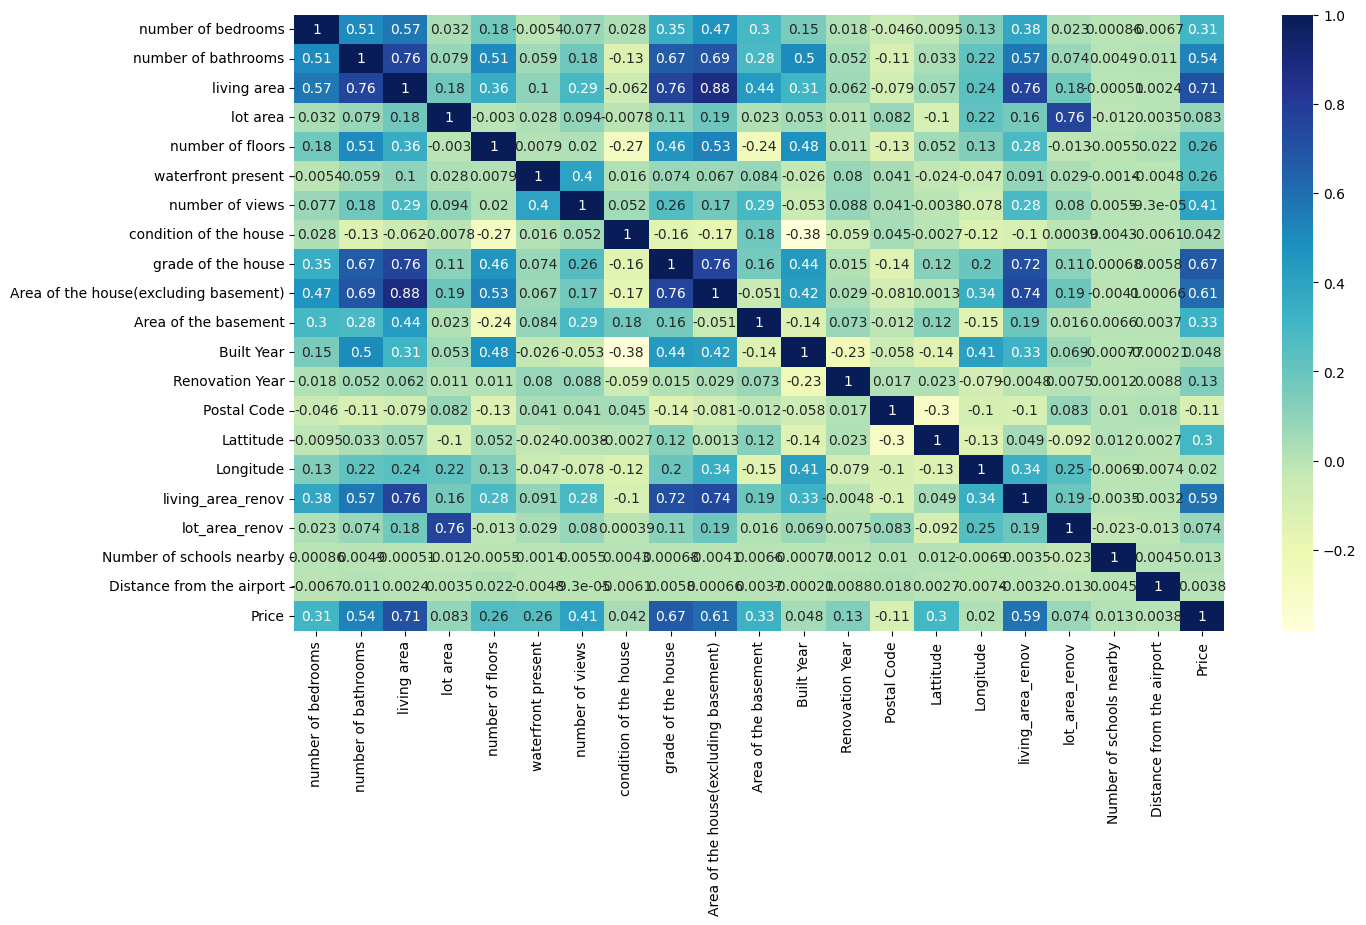

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [26]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
forest.score(X_test, y_test)

0.8830145588303242

In [31]:
predictions = forest.predict(X_test)

In [34]:
error = np.sqrt(metrics.mean_absolute_error(y_test, predictions))

In [35]:
error

258.15193974581723

In [36]:
X_test

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport
2630,4,2.50,2010,7972,2.0,0,0,4,8,2010,0,1989,0,122011,52.8082,-114.208,2100,8511,1,64
8265,5,4.75,6200,13873,2.0,1,4,4,11,4440,1760,1989,0,122029,52.8350,-114.302,2940,13525,1,75
2378,5,2.25,1970,15247,1.0,0,0,3,7,1450,520,1986,0,122036,52.7969,-114.095,1300,10800,2,80
498,4,2.00,2520,6000,1.0,0,0,3,8,1400,1120,1921,2007,122028,52.9067,-114.540,1580,3720,2,75
1415,4,2.50,2920,7200,1.0,0,3,3,8,1470,1450,1921,2006,122054,52.8247,-114.478,3210,6825,2,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851,2,1.00,600,4854,1.0,0,0,5,6,600,0,1922,0,122056,52.7227,-114.470,1470,5000,2,64
6750,3,1.50,1320,4400,1.0,0,0,3,6,1320,0,1909,0,122047,52.8531,-114.482,1350,4400,2,72
3774,3,2.25,2400,5300,1.5,0,0,4,7,1250,1150,1939,0,122007,52.9176,-114.574,1540,4800,2,67
4132,2,1.00,2160,12960,1.0,0,0,3,7,1360,800,1968,0,122056,52.7002,-114.451,2070,12960,1,58
